✅ Mean Absolute Error (MAE): 13.09
✅ R² Score: -0.56


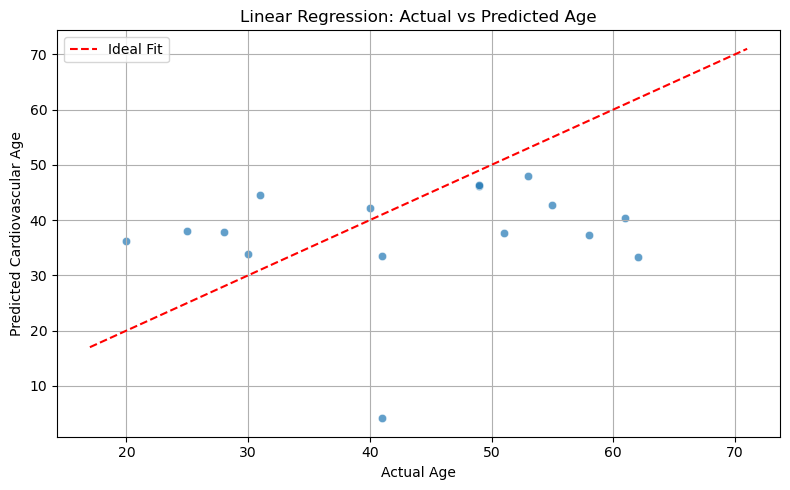

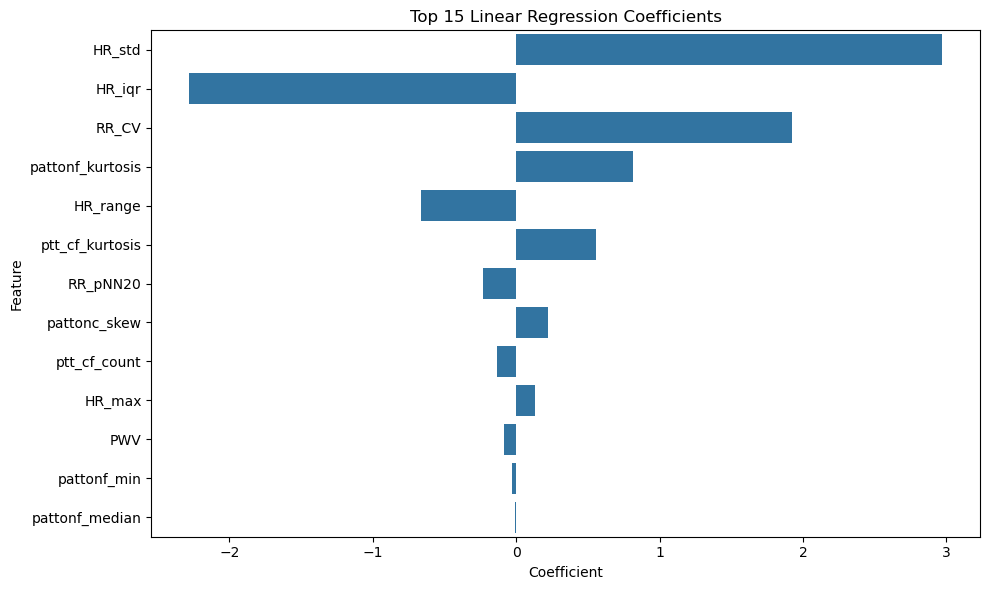

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

#Load the cleaned dataset
df = pd.read_csv("cleaned_tonometry_dataset.csv")  # Update path if needed

#Separate features and target
X = df.drop(columns=["Age"])
y = df["Age"]

#Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

#Predict and evaluate
y_pred = lr_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"✅ Mean Absolute Error (MAE): {mae:.2f}")
print(f"✅ R² Score: {r2:.2f}")

#Plot actual vs predicted values
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label="Ideal Fit")
plt.xlabel("Actual Age")
plt.ylabel("Predicted Cardiovascular Age")
plt.title("Linear Regression: Actual vs Predicted Age")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#Plot feature coefficients
coeff_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": lr_model.coef_
}).sort_values(by="Coefficient", key=abs, ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x="Coefficient", y="Feature", data=coeff_df.head(15))
plt.title("Top 15 Linear Regression Coefficients")
plt.tight_layout()
plt.show()
